In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

import sys
sys.path.append("../")
import edhec_risk_kit as erk

# using seaborn style (type plt.style.available to see available styles)
plt.style.use("seaborn-dark")

In [9]:
ind_rets = erk.get_ind_file(filetype="rets", nind=30)["1997":]
ind_rets.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1997-01,0.0289,0.1136,0.0463,0.0359,0.0075,0.0643,0.0644,0.0955,0.0378,0.0550,...,0.0234,0.0576,0.1027,0.0121,0.0240,0.0018,0.0034,0.0161,0.0659,0.0704
1997-02,0.0279,0.0274,0.1247,-0.0026,0.0239,0.0287,0.0312,0.0094,0.0110,0.0221,...,0.0228,-0.0510,-0.0805,0.0480,-0.0106,-0.0089,0.0563,-0.0315,0.0393,-0.0453
1997-03,-0.0120,-0.0653,-0.1354,-0.0320,0.0071,-0.0606,-0.0566,-0.0740,-0.0216,-0.0284,...,-0.0760,-0.0567,-0.0522,-0.0446,-0.0018,-0.0657,-0.0055,0.0165,-0.0663,-0.0430
1997-04,0.0337,0.1137,0.0324,0.0275,-0.0076,0.0845,-0.0410,0.0616,0.0324,-0.0334,...,0.0254,0.1047,0.0602,0.0366,0.0565,0.0054,0.0172,0.0611,0.0623,0.0097
1997-05,0.0257,0.0643,0.0998,0.0560,0.0706,0.0815,0.0501,0.0691,0.0455,0.0725,...,0.0664,0.1001,0.1020,0.0768,0.0612,0.0875,0.0643,0.0098,0.0588,0.0816


In [35]:
mkt_caps = erk.get_ind_market_caps(nind=30, weights=True)["1997":]
mkt_caps.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1997-01,0.027453,0.027252,0.014657,0.014549,0.011205,0.025672,0.006593,0.095988,0.028149,0.001899,...,0.065783,0.057842,0.103735,0.023032,0.017045,0.013505,0.048590,0.011023,0.176038,0.013620
1997-02,0.026682,0.028846,0.014576,0.014316,0.010713,0.025952,0.006670,0.099849,0.027762,0.001904,...,0.063793,0.058032,0.108629,0.022150,0.016487,0.012846,0.045951,0.010645,0.177737,0.013857
1997-03,0.027449,0.029690,0.016412,0.014255,0.010974,0.026720,0.006892,0.100769,0.027942,0.001947,...,0.065093,0.055129,0.099954,0.023194,0.016323,0.012745,0.048527,0.010327,0.184445,0.013245
1997-04,0.028461,0.029152,0.014778,0.014524,0.011629,0.026376,0.006836,0.097989,0.028734,0.001990,...,0.060846,0.054577,0.099719,0.023305,0.017126,0.012494,0.050369,0.011032,0.180462,0.013316
1997-05,0.028110,0.031130,0.014630,0.014290,0.011052,0.027371,0.006287,0.099571,0.028439,0.001844,...,0.059260,0.057527,0.100968,0.023158,0.017307,0.012038,0.048729,0.011220,0.183199,0.012890


In [48]:
# 1
cwr = erk.backtest_weight_scheme(ind_rets, window=36, weight_scheme=erk.weight_cw, cap_ws=mkt_caps)
cwr

1997-01         NaN
1997-02         NaN
1997-03         NaN
1997-04         NaN
1997-05         NaN
             ...   
2018-08    0.034929
2018-09    0.003134
2018-10   -0.069573
2018-11    0.020852
2018-12   -0.093852
Freq: M, Length: 264, dtype: float64

In [50]:
ewr = erk.backtest_weight_scheme(ind_rets, estimation_window=36)
ewr

1997-01         NaN
1997-02         NaN
1997-03         NaN
1997-04         NaN
1997-05         NaN
             ...   
2018-08    0.009337
2018-09   -0.001257
2018-10   -0.074427
2018-11    0.018667
2018-12   -0.096270
Freq: M, Length: 264, dtype: float64

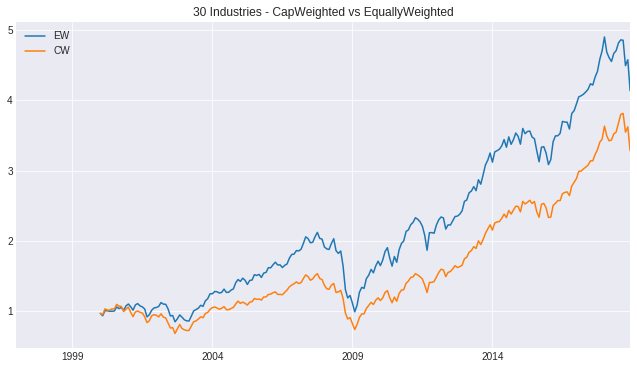

In [51]:
bt_rets   = pd.DataFrame({"EW": ewr, "CW": cwr})
bt_growth = (1 + bt_rets).cumprod()
bt_growth.plot(grid=True, figsize=(11,6), title="{} Industries - CapWeighted vs EquallyWeighted".format(30))
plt.show()

In [53]:
# 1-4
erk.summary_stats(bt_rets.dropna())

,Ann. return,Ann. vol,Sharpe ratio,Skewness,Kurtosis,Historic CVar,C-F Var,Max Drawdown
EW,0.077614,0.158685,0.291838,-0.538531,5.317042,0.106220,0.072485,-0.532980
CW,0.064564,0.151274,0.222191,-0.552933,4.248421,0.098269,0.070982,-0.518857


In [57]:
# 5， 7
ew_tr_rest = erk.backtest_weight_scheme(ind_rets, window=36, weight_scheme=erk.weight_ew, cap_ws=mkt_caps, max_cw_mult=2, microcap_thr=0.005)

bt_rets = pd.DataFrame({"EW": ewr, "EW-Tethered": ew_tr_rest, "CW": cwr})
erk.summary_stats(bt_rets.dropna())

,Ann. return,Ann. vol,Sharpe ratio,Skewness,Kurtosis,Historic CVar,C-F Var,Max Drawdown
EW,0.077614,0.158685,0.291838,-0.538531,5.317042,0.106220,0.072485,-0.532980
EW-Tethered,0.076299,0.145573,0.309367,-0.618829,4.938234,0.097571,0.067367,-0.506056
CW,0.064564,0.151274,0.222191,-0.552933,4.248421,0.098269,0.070982,-0.518857


In [58]:
# 6 not correct
erk.tracking_error(ewr, cwr)

0.18736759551222995

In [59]:
# 8 not correct
erk.tracking_error(ew_tr_rest, cwr)

0.11973692153419292

,Ann. return,Ann. vol,Sharpe ratio,Skewness,Kurtosis,Historic CVar,C-F Var,Max Drawdown
EW,0.077614,0.158685,0.291838,-0.538531,5.317042,0.106220,0.072485,-0.532980
CW,0.064564,0.151274,0.222191,-0.552933,4.248421,0.098269,0.070982,-0.518857
GMV-Sample,0.066768,0.117341,0.304828,-0.748830,4.500608,0.080764,0.055430,-0.419352
GMV-Shrink 0.25,0.068990,0.114453,0.331419,-0.728101,4.265047,0.077592,0.053755,-0.389455


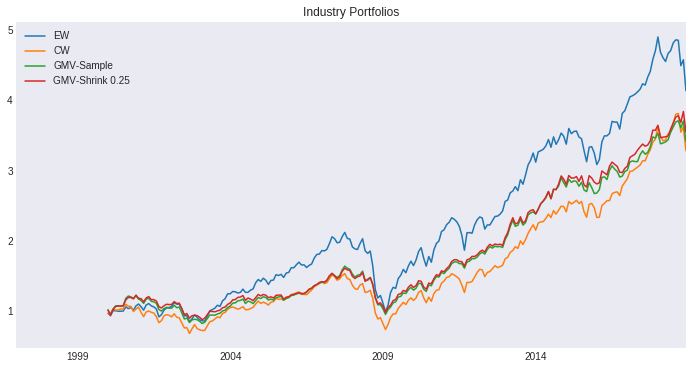

In [70]:
# 9-12
mv_s_r = erk.backtest_weight_scheme(ind_rets, window=36,weight_scheme=erk.weight_minvar,
                         ov_estimator=erk.sample_cov)

mv_sh_r = erk.backtest_weight_scheme(ind_rets, estimation_window=36, weight_scheme=erk.weight_minvar,
                          weighting=erk.weight_minvar, 
                          cov_estimator=erk.shrinkage_cov, delta=0.25)
btr = pd.DataFrame({"EW": ewr, "CW": cwr, "GMV-Sample": mv_s_r,
                    'GMV-Shrink 0.25': mv_sh_r})


(1+btr).cumprod().plot(figsize=(12,6), title="Industry Portfolios")
erk.summary_stats(btr.dropna())